In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib


In [5]:
data=pd.read_csv("/Users/donmariopriyankasubasinghe/Desktop/housing.csv")

In [6]:
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [7]:
print(data.isnull().sum())


id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64


In [8]:
data.dropna(inplace=True)


In [9]:
print(data.isnull().sum())

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64


In [10]:
def categorize_segment(price):
    if price > 3000:
        return 'Luxury'
    elif 1500 <= price <= 3000:
        return 'Mid-range'
    else:
        return 'Affordable'



In [11]:

data['market_segment'] = data['price'].apply(categorize_segment)

features = ['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 
            'dogs_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
            'comes_furnished', 'laundry_options', 'parking_options',  'state']
target = 'market_segment'  

X = data[features]
y = data[target]


categorical_features = ['region', 'type', 'laundry_options', 'parking_options', 'state']
numerical_features = ['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 
                     'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import numpy as np
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

X_train_transformed = np.hstack([X_train_num_scaled, X_train_cat_encoded])
X_test_transformed = np.hstack([X_test_num_scaled, X_test_cat_encoded])
   
  

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,f1_score



#Random Forest Model
Random_classifier = RandomForestClassifier(random_state=42, min_samples_split=5, min_samples_leaf=2)
Random_classifier.fit(X_train_transformed, y_train)

# Predict on training data
y_train_pred = Random_classifier.predict(X_train_transformed)
# Predict on testing data
y_test_pred = Random_classifier.predict(X_test_transformed)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print accuracies and F1 scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")



Training Accuracy: 0.9441
Testing Accuracy: 0.9280
Training F1 Score: 0.9418
Testing F1 Score: 0.9249


In [41]:
#Logistic Regressiont Model

LogisticRegression_classifier =  LogisticRegression(max_iter=1000)
LogisticRegression_classifier.fit(X_train_transformed, y_train)

# Predict on training data
y_train_pred = LogisticRegression_classifier.predict(X_train_transformed)
# Predict on testing data
y_test_pred = LogisticRegression_classifier.predict(X_test_transformed)

# Calculate accuracies
train_accuracy_LR = accuracy_score(y_train, y_train_pred)
test_accuracy_LR = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
f1_train_LR = f1_score(y_train, y_train_pred, average='weighted')
f1_test_LR = f1_score(y_test, y_test_pred, average='weighted')

# Print accuracies and F1 scores
print(f"Training Accuracy: {train_accuracy_LR:.4f}")
print(f"Testing Accuracy: {test_accuracy_LR:.4f}")
print(f"Training F1 Score: {f1_train_LR:.4f}")
print(f"Testing F1 Score: {f1_test_LR:.4f}")


Training Accuracy: 0.8779
Testing Accuracy: 0.8789
Training F1 Score: 0.8721
Testing F1 Score: 0.8730


In [45]:
#K Neighbors Classifier Model

KnnModel =  KNeighborsClassifier()
KnnModel.fit(X_train_transformed, y_train)

# Predict on training data
y_train_pred = KnnModel.predict(X_train_transformed)
# Predict on testing data
y_test_pred = KnnModel.predict(X_test_transformed)

# Calculate accuracies
train_accuracy_kn = accuracy_score(y_train, y_train_pred)
test_accuracy_kn = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
f1_train_kn = f1_score(y_train, y_train_pred, average='weighted')
f1_test_kn = f1_score(y_test, y_test_pred, average='weighted')

# Print accuracies and F1 scores
print(f"Training Accuracy: {train_accuracy_kn:.4f}")
print(f"Testing Accuracy: {test_accuracy_kn:.4f}")
print(f"Training F1 Score: {f1_train_kn:.4f}")
print(f"Testing F1 Score: {f1_test_kn:.4f}")


Training Accuracy: 0.9414
Testing Accuracy: 0.9176
Training F1 Score: 0.9407
Testing F1 Score: 0.9166


In [16]:
#Decision_tree Classifier Model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier

Decision_tree =  DecisionTreeClassifier()
Decision_tree.fit(X_train_transformed, y_train)

# Predict on training data
y_train_pred = Decision_tree.predict(X_train_transformed)
# Predict on testing data
y_test_pred = Decision_tree.predict(X_test_transformed)

# Calculate accuracies
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
f1_train_dt = f1_score(y_train, y_train_pred, average='weighted')
f1_test_dt = f1_score(y_test, y_test_pred, average='weighted')

# Print accuracies and F1 scores
print(f"Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Testing Accuracy: {test_accuracy_dt:.4f}")
print(f"Training F1 Score: {f1_train_dt:.4f}")
print(f"Testing F1 Score: {f1_test_dt:.4f}")

Training Accuracy: 0.9923
Testing Accuracy: 0.9282
Training F1 Score: 0.9922
Testing F1 Score: 0.9280


In [53]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes Classifier Model

Naive_Bayes =  GaussianNB()
Naive_Bayes.fit(X_train_transformed, y_train)

# Predict on training data
y_train_pred = Naive_Bayes.predict(X_train_transformed)
# Predict on testing data
y_test_pred = Naive_Bayes.predict(X_test_transformed)

# Calculate accuracies
train_accuracy_nb = accuracy_score(y_train, y_train_pred)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
f1_train_nb = f1_score(y_train, y_train_pred, average='weighted')
f1_test_nb = f1_score(y_test, y_test_pred, average='weighted')

# Print accuracies and F1 scores
print(f"Training Accuracy: {train_accuracy_nb:.4f}")
print(f"Testing Accuracy: {test_accuracy_nb:.4f}")
print(f"Training F1 Score: {f1_train_nb:.4f}")
print(f"Testing F1 Score: {f1_test_nb:.4f}")

Training Accuracy: 0.3207
Testing Accuracy: 0.3229
Training F1 Score: 0.4338
Testing F1 Score: 0.4372


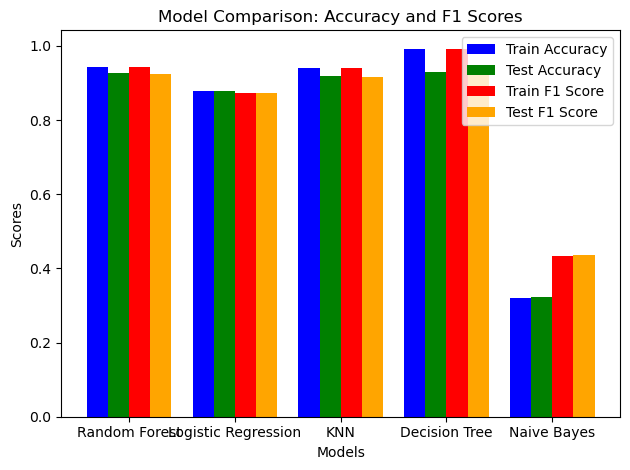

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = [
    "Random Forest", 
    "Logistic Regression", 
    "KNN", 
    "Decision Tree", 
    "Naive Bayes"
]

# Actual scores for each model
train_accuracy = [0.9441, 0.8779, 0.9414, 0.9923, 0.3207]  # Train accuracy
test_accuracy = [0.9280, 0.8789, 0.9176, 0.9284, 0.3229]   # Test accuracy
f1_train = [0.9418, 0.8721, 0.9407, 0.9922, 0.4338]        # Train F1 score
f1_test = [0.9249, 0.8730, 0.9166, 0.9281, 0.4372]         # Test F1 score

# Set the positions of the bars on the x-axis
x = np.arange(len(model_names))
width = 0.2  # Width of the bars

# Create the bar chart
plt.bar(x - width*1.5, train_accuracy, width, label='Train Accuracy', color='b')
plt.bar(x - width/2, test_accuracy, width, label='Test Accuracy', color='g')
plt.bar(x + width/2, f1_train, width, label='Train F1 Score', color='r')
plt.bar(x + width*1.5, f1_test, width, label='Test F1 Score', color='orange')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy and F1 Scores')
plt.xticks(x, model_names)  # Set the x-tick labels
plt.legend()  # Show the legend

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
import joblib

joblib.dump(Decision_tree, 'Market_Segment.pkl')

['Market_Segment.pkl']